In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from scipy import stats
#%pylab inline

In [2]:
init_notebook_mode(connected=True)

In [3]:
path = "/Volumes/friebelm/PhD/NU Plasma/Measurements/2017-01-16/"
filename = "Sn_H8_L4_2_cycles_internal_norm_116_120_bdg_corr_all.csv"

In [4]:
data = pd.read_csv(path + filename)

In [73]:
start_date = "2017-01-17 11:50"
end_date = "2017-01-17 18:30"
mask = (data['date'] > start_date) & (data['date'] <= end_date)
data_sub_time = data.loc[mask]

In [74]:
mean = np.nanmean(data_sub_time[data_sub_time["sample"] == "NIST 200ppb"]["124/120"])
epsilon = ((data_sub_time["124/120"]/mean)-1)*10000
epsilon

1040    0.360440
1041    1.124957
1042    0.791426
1043    0.369565
1044    1.347136
1045    1.146761
1046    0.825849
1047    0.502944
1048    0.919300
1049    0.729315
1050    1.092438
1051    0.923742
1052    0.185830
1053    0.185574
1054    0.873036
1055   -0.072082
1056    0.012494
1057    0.369719
1058    0.921956
1059   -0.620966
1060    0.204295
1061    0.994827
1062    1.197136
1063    0.895418
1064    1.152334
1065    0.635120
1066    0.197966
1067    0.983799
1068   -0.399739
1069    1.274946
          ...   
1470   -0.582377
1471    0.287339
1472   -0.033840
1473   -0.888864
1474    0.147274
1475    0.328416
1476   -0.238615
1477   -0.126003
1478   -0.045458
1479    0.026781
1480   -0.561736
1481   -0.664251
1482   -0.444961
1483   -0.292990
1484   -0.595657
1485   -0.513672
1486   -0.340710
1487    0.032126
1488   -0.658569
1489    0.596271
1490    0.305376
1491   -0.465290
1492    0.022411
1493   -0.166163
1494    0.018161
1495    0.720475
1496   -0.735489
1497   -0.2528

In [56]:
def epsilon(x):
    return ((x/np.nanmean(x))-1)*10000

In [80]:
plot_data = data_sub_time
x = plot_data.index
filter_sample = "NIST 200ppb"
y1 = plot_data["124/120"]
y2 = plot_data["120"]
plot_data["124/120"] = epsilon
#y1 = data[data["sample"] == filter_sample]["124/120"]
#y2 = data[data["sample"] == filter_sample]["120"]

trace1 = go.Scatter(
    x = plot_data[plot_data["sample"] == filter_sample].date,
    y = plot_data[plot_data["sample"] == filter_sample]["124/120"],
    mode="markers",
    name="NIST 200ppb", 
    text = plot_data["sample"])

trace1_1 = go.Scatter(
    x = plot_data[plot_data["sample"] != filter_sample].date,
    y = plot_data[plot_data["sample"] != filter_sample]["124/120"],
    mode="markers",
    name="samples", 
    text = plot_data[plot_data["sample"] != filter_sample]["sample"])

trace2 = go.Scatter(
    x = plot_data[plot_data["sample"] == filter_sample].date,
    y = plot_data[plot_data["sample"] == filter_sample]["120"],
    mode="markers",
    name="NIST 200ppb", 
    text = plot_data[plot_data["sample"] == filter_sample]["sample"])

trace2_2 = go.Scatter(
    x = plot_data[plot_data["sample"] != filter_sample].date,
    y = plot_data[plot_data["sample"] != filter_sample]["120"],
    mode="markers",
    name="samples", 
    text = plot_data[plot_data["sample"] != filter_sample]["sample"])

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace1_1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace2_2, 2, 1)
fig['layout']['yaxis2'].update(title='120Sn (V)', range=[0, 30])
fig['layout']['yaxis1'].update(title='e124Sn/120Sn')
fig['layout'].update(height=800, width=800, title='2017-01-16_single data points - meteorite block')
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



/Users/matthias/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [76]:
plot_data["124/120"]

1040    0.360440
1041    1.124957
1042    0.791426
1043    0.369565
1044    1.347136
1045    1.146761
1046    0.825849
1047    0.502944
1048    0.919300
1049    0.729315
1050    1.092438
1051    0.923742
1052    0.185830
1053    0.185574
1054    0.873036
1055   -0.072082
1056    0.012494
1057    0.369719
1058    0.921956
1059   -0.620966
1060    0.204295
1061    0.994827
1062    1.197136
1063    0.895418
1064    1.152334
1065    0.635120
1066    0.197966
1067    0.983799
1068   -0.399739
1069    1.274946
          ...   
1470   -0.582377
1471    0.287339
1472   -0.033840
1473   -0.888864
1474    0.147274
1475    0.328416
1476   -0.238615
1477   -0.126003
1478   -0.045458
1479    0.026781
1480   -0.561736
1481   -0.664251
1482   -0.444961
1483   -0.292990
1484   -0.595657
1485   -0.513672
1486   -0.340710
1487    0.032126
1488   -0.658569
1489    0.596271
1490    0.305376
1491   -0.465290
1492    0.022411
1493   -0.166163
1494    0.018161
1495    0.720475
1496   -0.735489
1497   -0.2528

In [15]:
low_signal = 0
high_signal = 1
mask = (data['120'] > low_signal) & (data['120'] <= high_signal)
data_sub_signal = data.loc[mask]

In [16]:
data_sub_signal

,date,111/120,112/120,113/120,114/120,115/120,116/120,117/120,118/120,119/120,...,114,117,116,111,125,113,112,124,119,118
640,2017-01-17 05:35:00,5.402486e-05,0.029748,-5.673805e-05,0.020126,0.010355,NaN,0.235363,0.742849,0.263433,...,0.009375,0.113693,0.212471,2.395975e-05,3.258163e-05,-0.000003,0.013432,0.094250,0.130802,0.363821
641,2017-01-17 05:35:00,-6.352767e-06,0.029844,1.927413e-05,0.020210,0.010321,0.446,0.235338,0.742808,0.263477,...,0.009340,0.113514,0.212152,-2.814047e-06,8.014963e-06,0.000006,0.013408,0.094112,0.130621,0.363250
642,2017-01-17 05:35:00,-3.358990e-05,0.029923,5.882951e-05,0.020330,0.010329,0.446,0.235252,0.742769,0.263400,...,0.009394,0.113771,0.212715,-1.492315e-05,-1.188751e-05,0.000012,0.013460,0.094341,0.130913,0.364169
643,2017-01-17 05:35:00,7.290485e-05,0.029855,-2.555348e-08,0.020226,0.010340,0.446,0.235314,0.742821,0.263458,...,0.009559,0.115081,0.215119,3.273875e-05,1.200275e-05,0.000032,0.013665,0.095449,0.132434,0.368316
644,2017-01-17 05:35:00,-4.157584e-05,0.029878,5.634211e-05,0.020267,0.010283,0.446,0.235241,0.742718,0.263346,...,0.009565,0.116319,0.217473,-1.887875e-05,-8.499178e-06,0.000008,0.013730,0.096472,0.133838,0.372336
645,2017-01-17 05:35:00,5.397430e-05,0.029759,7.242328e-08,0.020207,0.010339,NaN,0.235336,0.742790,0.263438,...,0.009651,0.116557,0.217846,2.454065e-05,-1.920723e-05,0.000024,0.013776,0.096643,0.134120,0.373007
646,2017-01-17 05:35:00,1.955388e-05,0.029775,-2.096874e-05,0.020162,0.010345,0.446,0.235346,0.742965,0.263466,...,0.009580,0.116410,0.217549,8.878053e-06,-6.461328e-07,-0.000001,0.013734,0.096523,0.133965,0.372615
647,2017-01-17 05:35:00,-5.000581e-05,0.029880,1.273053e-05,0.020324,0.010311,0.446,0.235320,0.742963,0.263490,...,0.009471,0.115008,0.214935,-2.243405e-05,-2.028722e-05,-0.000016,0.013560,0.095395,0.132377,0.368165
648,2017-01-17 05:35:00,-3.055932e-05,0.029871,4.518384e-05,0.020282,0.010333,NaN,0.235257,0.742851,0.263444,...,0.009600,0.116523,0.217842,-1.389925e-05,1.311047e-05,0.000008,0.013759,0.096673,0.134116,0.373034
649,2017-01-17 05:35:00,2.775923e-05,0.029793,-3.789009e-05,0.020148,0.010366,NaN,0.235402,0.742847,0.263430,...,0.009467,0.115041,0.214941,1.245245e-05,2.006747e-05,-0.000005,0.013585,0.095389,0.132339,0.368085


In [17]:
x = plot_data.index
filter_sample = "NIST 6ppb"
y1 = plot_data["124/120"]
y1_2 = plot_data["118/120"]
y2 = plot_data["120"]
#y1 = data[data["sample"] == filter_sample]["124/120"]
#y2 = data[data["sample"] == filter_sample]["120"]

trace1 = go.Scatter(
    x = x, 
    y = y1, 
    mode="lines+markers",
    name=str(y1.name), 
    text = plot_data["sample"])

trace1_1 = go.Scatter(
    x = x, 
    y = y1_2, 
    mode="lines+markers",
    name=str(y1.name), 
    text = plot_data["sample"])

trace2 = go.Scatter(
    x = x,
    y = y2,
    yaxis = dict(
        range = [0, 30]),
    mode="lines+markers", 
    name=str(y2.name), 
    text = plot_data["sample"])

Layout = go.Layout(
    xaxis=dict(
        range=[0, 30]
    ))

fig = tools.make_subplots(rows=1, cols=2)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig['layout']['yaxis2'].update(title='120Sn (V)', range=[0, 30])
fig['layout']['yaxis1'].update(title='124Sn/120Sn', range=[0.17753, 0.17763])

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [20]:
data_sub_signal.set_index(data_sub_signal.date, inplace=True)
sample_name = data_sub_signal[~data_sub_signal.index.duplicated(keep='first')]["sample"]
plot_data = data_sub_signal.groupby(data_sub_signal["date"]).agg(np.mean)
plot_data_epsilon = plot_data.apply(epsilon)
plot_data["sample"] = sample_name
plot_data_epsilon["sample"] = sample_name
x = plot_data.index
filter_sample = "NIST 6ppb"
y1 = plot_data_epsilon[plot_data_epsilon["sample"] == filter_sample]
y2 = plot_data_epsilon[plot_data_epsilon["sample"] != filter_sample]
#y1 = data[data["sample"] == filter_sample]["124/120"]
#y2 = data[data["sample"] == filter_sample]["120"]

trace1 = go.Scatter(
    x = y1.index, 
    y = y1["117/120"], 
    mode="markers",
    name="NIST 200ppb", 
    text=y1["sample"])

trace1_2 = go.Scatter(
    x = y2.index, 
    y = y2["117/120"], 
    mode="markers",
    name="samples+doped Stds", 
    text=y2["sample"])

trace2 = go.Scatter(
    x = plot_data[plot_data["sample"] == filter_sample].index,
    y = plot_data[plot_data["sample"] == filter_sample]["120"],
    yaxis = dict(
        range = [0, 30]),
    mode="markers",
    name="NIST 200ppb", 
    text=y1["sample"])

trace2_2 = go.Scatter(
    x = plot_data[plot_data["sample"] != filter_sample].index,
    y = plot_data[plot_data["sample"] != filter_sample]["120"],
    yaxis = dict(
        range = [0, 30]),
    mode="markers",
    name="samples+doped Stds", 
    text=y2["sample"])

Layout = go.Layout(
    autosize=False,
    width=500,
    height=500,
    xaxis=dict(
        range=[0, 30]
    ))

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace1_2, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace2_2, 2, 1)
fig['layout']['yaxis2'].update(title='120Sn (V)', range=[0, 30])
fig['layout']['yaxis1'].update(title='e117Sn/120Sn', range=[-1, 1])
fig['layout'].update(height=1000, width=800, title='2017-01-16_Drift 200ppb')
#fig['layout']['xaxis2'].update(title='Date', range=["2017-01-17 11:00", "2017-01-18 04:00"])
#fig['layout']['xaxis1'].update(title='Date', range=["2017-01-17 11:00", "2017-01-18 04:00"])

iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [201]:
#plot_data_epsilon[plot_data_epsilon["sample"] == "MIL09001 bomb 1_1"]["124/120"]
plot_data[plot_data["sample"] == "MIL09001 bomb 1_1"]["124/120"]

date
2017-01-17 16:02:00    0.177564
Name: 124/120, dtype: float64

   Unnamed: 0_level_0 111/120     112/120     113/120     114/120     115/120  \
   Unnamed: 0_level_1    mean SD2    mean SD2    mean SD2    mean SD2    mean   
0                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
1                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
2                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
3                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
4                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
5                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
6                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
7                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
8                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
9                 NaN     NaN NaN     NaN NaN     NaN NaN     NaN NaN     NaN   
10                NaN     Na

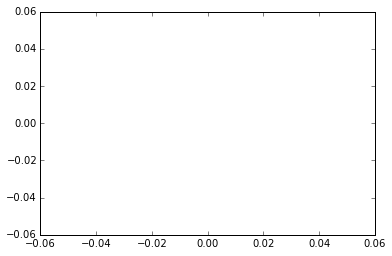

In [24]:
# variation of standard data + mean + 2SD
sel_ratio = "117/120"
plot_Nist = data[data["sample"] == "NIST 200ppb"]
print plot_Nist
plot_Nist = plot_Nist[(plot_Nist["118"] >= .5)]
#dataplot = plt.plot(plot_Nist["Te/Sn"], plot_Nist["124/118"], "ro")
plt.plot(plot_Nist.index, plot_Nist[sel_ratio]["mean"], linestyle='-', marker='o', color='b')
#plt.errorbar(plot_Nist.index, plot_Nist[sel_ratio]["mean"], yerr = plot_Nist[sel_ratio]["SD2"], marker="o", color='b')
plt.plot(plot_Nist.index, pd.rolling_mean(plot_Nist[sel_ratio]["mean"], 2), linestyle='-', color='r')
plt.axhline(plot_Nist[sel_ratio]["mean"].mean(), color='r', linestyle='-')
plt.axhline(plot_Nist[sel_ratio]["mean"].mean()+ 2*plot_Nist[sel_ratio]["mean"].std(), color='r', linestyle='--')
plt.axhline(plot_Nist[sel_ratio]["mean"].mean()- 2*plot_Nist[sel_ratio]["mean"].std(), color='r', linestyle='--')
#dataplot = plt.plot(plot_Nist.index, plot_Nist["120"], "ro")
plt.show()